**Import Standard Libraries**

In [3]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import scipy.constants as scp
import astropy.constants as asc
#import seaborn as sns   # Optional plotting library
import json, shutil, zipfile, tarfile
from astropy.io import fits

In [4]:
from ipywidgets import interact, interact_manual, interactive, fixed
import ipywidgets as widgets

<u><h2>The data files</h2></u>
<ul>
  <li>The pulsar radio polarisation data is taken from the paper <a href="https://ui.adsabs.harvard.edu/abs/2018MNRAS.474.4629J/abstract" target="_blank"><i>Polarimetry of 600 pulsars from observations at 1.4 GHz with the Parkes radio telescope</i></a>.</li>
  <li>The file may be downloaded from source through the DOI link: <a href="https://doi.org/10.25919/5c9af9fbe71c9" target="_blank">https://doi.org/10.25919/5c9af9fbe71c9</a>.</li>
  <li>Alternatively, download a copy from our <a href="https://drive.google.com/file/d/1W7MZBYVQJTNDiZu1KE986ipQ0eobshg4/view?usp=sharing
  " target="_blank">Google drive</a>.</li>
  <li>Download and save a copy in your Google drive</li>
</ul>



<h4>Access data from Google drive and load to notebook</h4>
<p>The code in the cell below allows you to access a file saved in the Google drive. You need to simply do two things to make it work:</p>
1. Enter the 'file_id'. This is an alpha-numeric string obtained from the sharing link of the data file. If the sharing link looks something like: <a href="https://drive.google.com/file/d/1W7MZBYVQJTNDiZu1KE986ipQ0eobshg4/view?usp=sharing" target="_blank">https://drive.google.com/file/d/1W7MZBYVQJTNDiZu1KE986ipQ0eobshg4/view?usp=sharing</a>, file_id is the part between "d/" and "/view".</br>
2. Run the cell, click on the authentication link generated by the cell, sign-in with your Gmail account, copy the code generated in the next page, and enter it in the field provided below the cell to allow file access


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
# Download a file based on its file ID.
#
# A file ID looks like: 1W7MZBYVQJTNDiZu1KE986ipQ0eobshg4
file_id = '1W7MZBYVQJTNDiZu1KE986ipQ0eobshg4'
downloaded = drive.CreateFile({'id': file_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))
print('title: %s, mimeType: %s' % (downloaded['title'], downloaded['mimeType']))

title: fitsfiles.tar.gz, mimeType: application/x-gzip


In [ ]:
downloaded.GetContentFile('fitsfiles.tar.gz') # Downloads the file from the Google drive location

<h4>Open the gzipped archive and get the list of filenames. Extract pulsar names from the filenames.<h4>

In [7]:
tar = tarfile.open('/content/fitsfiles.tar.gz', "r:gz")  # Opens the gzipped archive
Dlist = tar.getnames()                          # Obtains file names from the gzipped archive
Pulsarlist = [ D.split('.')[0] for D in Dlist ] # Split the file name string to isolate the pulsar names. File name format is "<Pulsar JName>.1400MHz.psrfits"
print('List of pulsar data available:')
print(Pulsarlist, sep = ", ")                   # List the pulsars

List of pulsar data available:
['J0034-0721', 'J0051+0423', 'J0108-1431', 'J0134-2937', 'J0151-0635', 'J0152-1637', 'J0206-4028', 'J0211-8159', 'J0255-5304', 'J0304+1932', 'J0343-3000', 'J0401-7608', 'J0448-2749', 'J0450-1248', 'J0452-1759', 'J0459-0210', 'J0520-2553', 'J0525+1115', 'J0528+2200', 'J0533+0402', 'J0536-7543', 'J0540-7125', 'J0543+2329', 'J0601-0527', 'J0614+2229', 'J0624-0424', 'J0627+0706', 'J0630-2834', 'J0631+1036', 'J0636-4549', 'J0656-2228', 'J0656-5449', 'J0659+1414', 'J0709-5923', 'J0719-2545', 'J0726-2612', 'J0729-1448', 'J0729-1836', 'J0738-4042', 'J0742-2822', 'J0745-5353', 'J0746-4529', 'J0749-4247', 'J0758-1528', 'J0807-5421', 'J0809-4753', 'J0818-3232', 'J0820-1350', 'J0820-3826', 'J0820-3921', 'J0820-4114', 'J0821-4221', 'J0823+0159', 'J0834-4159', 'J0835-4510', 'J0837+0610', 'J0837-4135', 'J0838-2621', 'J0840-5332', 'J0842-4851', 'J0843-5022', 'J0846-3533', 'J0849-6322', 'J0855-4644', 'J0856-6137', 'J0857-4424', 'J0901-4624', 'J0902-6325', 'J0904-7459', 'J

<h4>Select one of the pulsars from the list and access the corresponding file.</h4>

In [8]:
Pulsar = 'J0901-4624' #@param ['J0051+0423', 'J0206-4028', 'J0401-7608', 'J0520-2553', 'J0540-7125', 'J0627+0706', 'J0656-5449', 'J0729-1448', 'J0746-4529', 'J0818-3232', 'J0821-4221', 'J0837-4135', 'J0846-3533', 'J0901-4624', 'J0905-6019', 'J0912-3851', 'J0932-3217', 'J0942-5552', 'J0953+0755', 'J1001-5939', 'J1016-5345', 'J1019-5749', 'J1036-4926', 'J1046-5813', 'J1052-5954', 'J1056-6258', 'J1105-43', 'J1112-6613', 'J1117-6154', 'J1123-6102', 'J1130-6807', 'J1138-6207', 'J1146-6030', 'J1204-6843', 'J1225-5556', 'J1237-6725', 'J1244-5053', 'J1302-6350', 'J1319-6056', 'J1326-6700', 'J1331-5245', 'J1341-6220', 'J1357-62', 'J1406-6121', 'J1413-6141', 'J1420-6048', 'J1432-5032', 'J1453-6413', 'J1512-5759', 'J1517-4356', 'J1528-3146', 'J1531-5610', 'J1536-3602', 'J1541-5535', 'J1548-5607', 'J1553-5456', 'J1600-5751', 'J1603-5657', 'J1611-5209', 'J1614-3937', 'J1622-3751', 'J1626-6621', 'J1630-4733', 'J1633-5015', 'J1637-4553', 'J1640-4715', 'J1646-4346', 'J1648-6044', 'J1650-4502', 'J1651-7642', 'J1654-2713', 'J1700-4422', 'J1702-4310', 'J1705-3950', 'J1707-4053', 'J1709-4429', 'J1716-4005', 'J1717-5800', 'J1721-3532', 'J1726-3530', 'J1732-4128', 'J1735-0724', 'J1738-3211', 'J1739-3131', 'J1741-0840', 'J1743-3150', 'J1745-3812', 'J1751-4657', 'J1759-2302', 'J1802-3346', 'J1805-2948', 'J1807-2715', 'J1811-0154', 'J1814-1649', 'J1817-3837', 'J1820-1818', 'J1825-0935', 'J1828-0611', 'J1831-0823', 'J1833-0338', 'J1835-0944', 'J1837-0045', 'J1837-1837', 'J1839-0905', 'J1841-0524', 'J1843-0000', 'J1844-0256', 'J1846-4249', 'J1850+0026', 'J1852-2610', 'J1900-2600', 'J1904+0004', 'J1907+0918', 'J1913+0904', 'J1917+1353', 'J1932-3655', 'J1943+0609', 'J1947+0915', 'J2048-1616', 'J2144-3933', 'J2346-0609'] {allow-input: true}

print('Selected pulsar is PSR'+Pulsar)
pfile = Pulsar+'.1400MHz.psrfits'
print('Filename: {0}'.format(pfile))

Selected pulsar is PSRJ0901-4624
Filename: J0901-4624.1400MHz.psrfits


<h3><b>Step 1.</b> Read the information stored in the FITS headers</h3>
<ul>
<li><a href="https://docs.astropy.org/en/stable/io/fits/" target="_blank">astropy.io</a> contains the fits package to work with fits files.</li>
  <li> Print the list of HDUs in the fits file. <i>fits.open()</i> opens the file and returns a list of HDUs which can listed using <i>.info()</i></li>
  <li> Print the header and data contained in PSRPARAM HDU. HDU names can be passed as index to the returned fits.open() object to access the HDU. HDU header is accessed through <i>.header</i> and data through <i>.data</i>.</li>
  <li>Print the SUBINT HDU header and data which contains the IQUV data array. </li>
<li>Print the DAT_OFFS and DAT_SCL values stored in the data section of the SUBINT HDU. </li>
</ul>

In [9]:
# Code for Step 1 goes here
hdul=fits.open(tar.extractfile(pfile))
hdul.info()

Filename: /content/fitsfiles.tar.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   ()      
  1  HISTORY       1 BinTableHDU     71   5R x 28C   [24A, 256A, 8A, 8A, 1J, 1I, 1I, 1I, 1D, 1D, 1J, 1D, 1D, 1D, 1I, 1I, 1I, 1I, 1I, 32A, 32A, 32A, 256A, 32A, 32A, 1I, 32A, 1I]   
  2  PSRPARAM      1 BinTableHDU     12   46R x 1C   [128A]   
  3  T2PREDICT     1 BinTableHDU     12   22R x 1C   [128A]   
  4  BANDPASS      1 BinTableHDU     20   1R x 3C   [2E, 2E, 2050I]   
  5  SUBINT        1 BinTableHDU     88   1R x 20C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1E, 1E, 1D, 1D, D, E, 4E, 4E, 4096I]   
  6  DIG_STAT      1 BinTableHDU     21   1R x 2C   [2E, 24E]   
  7  DIG_CNTS      1 BinTableHDU     24   1R x 3C   [E, E, 1024I]   


In [10]:
params=hdul[2]
subint= hdul[5]

In [11]:
params.header

XTENSION= 'BINTABLE'           / ***** Pulsar ephemeris *****                   
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  128 / width of table in bytes                        
NAXIS2  =                   46 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    1 / Number of fields per row                       
TTYPE1  = 'PARAM   '           / Text file stored row by row                    
TFORM1  = '128A    '           / Allow 128 char per row                         
EXTNAME = 'PSRPARAM'           / Name of this binary table extension            
EXTVER  =                    1 / auto assigned by template parser               

In [12]:
subint.header

XTENSION= 'BINTABLE'           / ***** Subintegration data  *****               
BITPIX  =                    8 / N/A                                            
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 8336 / width of table in bytes                        
NAXIS2  =                    1 / Number of rows in table (NSUBINT)              
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   20 / Number of fields per row                       
TTYPE1  = 'INDEXVAL'           / Optionally used if INT_TYPE != TIME            
TFORM1  = '1D      '           / Double                                         
TTYPE2  = 'TSUBINT '           / Length of subintegration                       
TFORM2  = '1D      '           / Double                                         
TTYPE3  = 'OFFS_SUB'        

In [13]:
subint.columns

ColDefs(
    name = 'INDEXVAL'; format = '1D'
    name = 'TSUBINT'; format = '1D'; unit = 's'
    name = 'OFFS_SUB'; format = '1D'; unit = 's'
    name = 'LST_SUB'; format = '1D'; unit = 's'
    name = 'RA_SUB'; format = '1D'; unit = 'deg'
    name = 'DEC_SUB'; format = '1D'; unit = 'deg'
    name = 'GLON_SUB'; format = '1D'; unit = 'deg'
    name = 'GLAT_SUB'; format = '1D'; unit = 'deg'
    name = 'FD_ANG'; format = '1E'; unit = 'deg'
    name = 'POS_ANG'; format = '1E'; unit = 'deg'
    name = 'PAR_ANG'; format = '1E'; unit = 'deg'
    name = 'TEL_AZ'; format = '1E'; unit = 'deg'
    name = 'TEL_ZEN'; format = '1E'; unit = 'deg'
    name = 'AUX_DM'; format = '1D'; unit = 'CM-3'
    name = 'AUX_RM'; format = '1D'; unit = 'RAD'
    name = 'DAT_FREQ'; format = 'D'; unit = 'MHz'
    name = 'DAT_WTS'; format = 'E'
    name = 'DAT_OFFS'; format = '4E'
    name = 'DAT_SCL'; format = '4E'
    name = 'DATA'; format = '4096I'; unit = 'Jy'; dim = '(1024,1,4)'
)

In [14]:
data=subint.data[0][-1]
data.shape

(4, 1, 1024)

<h3><b>Step 2.</b> Extract IQUV raw data values from the stored integer array</h3>
<ul>
<li>Obtain the raw IQUV data array by applying the scaling DAT_SCL and offset DAT_OFFS to the integer DATA array.</li>
</ul>

In [15]:
# Code for Step 2 goes here
#I would extract the array into columns, first.
i= data[0]
q= data[1]
u=data[2] 
v=data[3]
print(i.shape,q.shape, u.shape, v.shape)

(1, 1024) (1, 1024) (1, 1024) (1, 1024)


In [16]:
#DAT Offset
dataOFF= subint.data['DAT_OFFS']
dataOFF

array([[37849.78   ,   417.0874 ,   226.80507,   594.16724]],
      dtype=float32)

In [17]:
#Data Scale Factor
dataSCL= subint.data['DAT_SCL']
dataSCL

array([[0.00107709, 0.0008538 , 0.00048415, 0.00066928]], dtype=float32)

In [18]:
def scaling(dataArr, dataSCL, dataOFF):
    rawDATAi= (dataSCL[0,0]*dataArr[0]) + dataOFF[0,0]
    rawDATAq= (dataSCL[0,1]*dataArr[1]) + dataOFF[0,1]
    rawDATAu= (dataSCL[0,2]*dataArr[2]) + dataOFF[0,2]
    rawDATAv= (dataSCL[0,3]*dataArr[3]) + dataOFF[0,3]
    return rawDATAi, rawDATAq, rawDATAu, rawDATAv

<h3><b>Step 3.</b> Isolate the I, Q, U, V components for the pulsar signal</h3>
<ul>
<li>Baseline subtraction for the I, Q, U, V components can be achieved by determining the average baseline value and subtracting.</li>
<li>A simple way of detemining average baseline value, for most narrow radio profiles, is to sort the array and find the average for an appropriate sub-set of array values from the middle of the sorted array.</li>
</ul>

In [19]:
#Different Channel Data Isolation
DATAi, DATAq, DATAu, DATAv = scaling(data, dataSCL, dataOFF)

In [20]:
# Function to determine baseline average of a I, Q, U, or V array
def baselineSUB(unscaledData):
    sortedData= np.sort(unscaledData)
    baselineData= sortedData[0,300:612]
    return unscaledData-np.mean(baselineData)

In [21]:
# Code to convert raw IQUV data to IQUV data of the pulsar
DATAiCorrected= baselineSUB(DATAi)
DATAqCorrected= baselineSUB(DATAq)
DATAuCorrected= baselineSUB(DATAu)
DATAvCorrected= baselineSUB(DATAv)

<h3><b>Step 4.</b> Calculate the linear polarization component and the polarization angle</h3>
<ul>
<li>Intensity of linear polarization component is obtained from $$L = \sqrt{Q^2+U^2}$$</li>
<li>Polarization angle is obtained by using the expression $$\psi = \frac{1}{2}\arctan\left(\frac{U}{Q}\right)$$</li>
</ul>

In [22]:
# Code for Step 4
polAngle= np.degrees(0.5* np.arctan((DATAuCorrected/DATAqCorrected)))

In [23]:
polAngle.max(), polAngle.min()

(44.698753, -44.88928)

In [24]:
linearPol= np.sqrt(np.square(DATAqCorrected)+np.square(DATAuCorrected))

<h3><b>Step 5.</b> Plot the integrated profile, linear and circular polarization intensities, and polarization angle</h3>
<ul>
<li>The intensities can all be overplotted in a single plot.</li>
<li>Plot the polarization angle in degrees.</li>
</ul>

In [25]:
#time axis as bins=1024 and tbin=0.000346452164510113
phase=np.arange(-180, 180, 0.3515625)
time = np.arange(0.000431660129140954,0.3547670165,(0.000431660129140954/1024))
#TBIN=0.000346452164510113

In [26]:
time.shape,phase.shape

((840568,), (1024,))

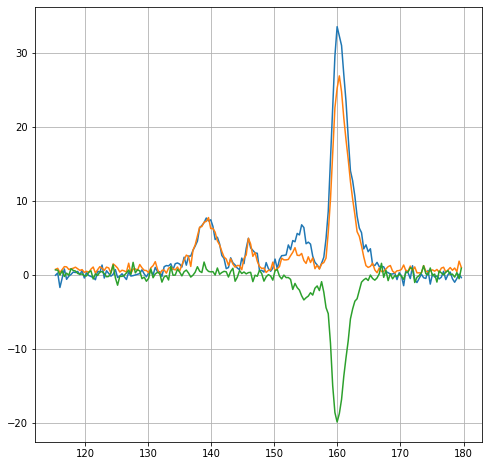

In [27]:
#Phase wise plotting
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(phase[840:], DATAiCorrected[0,840:])
plt.plot(phase[840:], linearPol[0,840:])
plt.plot(phase[840:], DATAvCorrected[0,840:])
plt.show()

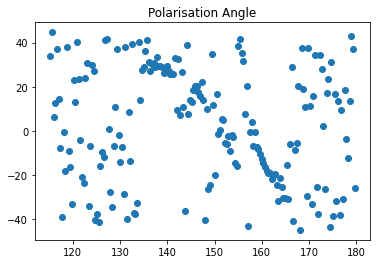

In [28]:
plt.title("Polarisation Angle")
plt.scatter(phase[840:], polAngle[0,840:])

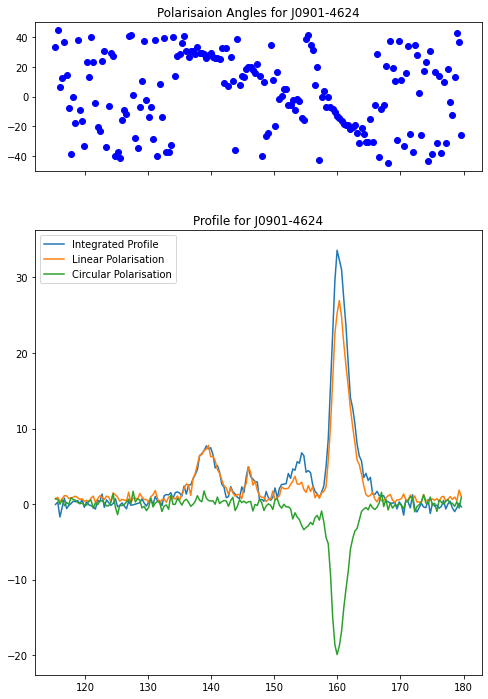

In [37]:
fig, ax = plt.subplots(2, figsize=(8,12), sharex=True, gridspec_kw={'height_ratios': [1, 3]})
ax[1].title.set_text('Profile for '+Pulsar)
ax[1].plot(phase[840:], DATAiCorrected[0,840:])
ax[1].plot(phase[840:], linearPol[0,840:])
ax[1].plot(phase[840:], DATAvCorrected[0,840:])
ax[1].legend(["Integrated Profile", "Linear Polarisation", "Circular Polarisation"])
#plotting angle around two pulses
ax[0].title.set_text('Polarisaion Angles for '+Pulsar)
ax[0].set_ylim(-50,50)
ax[0].scatter(phase[840:], polAngle[0,840:], color='b')